# Start Machine Learning

## Data Preparation

In [16]:
# Machine Learning Model
# Import data
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/syedrayhanmasud/ML-Datasets/main/houses_to_rent.csv")

# Remove unnamed column
df = df.iloc[:, 1:]

# Label encoding
map={"acept":1,"not acept":0, "furnished":1, "not furnished":0, "Sem info": 0}
df["animal"]=df["animal"].map(map)
df["furniture"]=df["furniture"].map(map)

# Removing Currency symbol, sem info and incluso
numeric_cols = ['hoa','rent amount', 'property tax', 'fire insurance', 'total','floor']
values_to_replace = ['Sem info', 'Incluso','-']

for col in numeric_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('$', '', regex=False).str.replace(',', '',regex=False).str.replace('R', '',regex=False)
    df[col] = df[col].replace(values_to_replace, 0)
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert columns to numeric

#print(df.dtypes) #Verify data type
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,1,160,3,2,2,0,0,0,0,3500,250,53,3803


## Splitting Data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'total' is the target column you want to predict
y = df['total']

# Assuming you want to use all columns except 'total' as features
X = df.drop('total', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
X_train

Shape of X_train: (4864, 12)
Shape of X_test: (1216, 12)
Shape of y_train: (4864,)
Shape of y_test: (1216,)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
1059,0,81,3,2,2,3,1,0,780,2230,128,29
652,1,130,2,1,1,9,1,0,1159,3850,160,49
2849,1,170,3,2,1,14,0,0,1050,4500,263,58
4492,1,170,3,2,1,0,1,0,0,2050,148,31
2201,1,33,1,1,0,18,1,1,350,1300,21,17
...,...,...,...,...,...,...,...,...,...,...,...,...
6026,1,319,4,6,5,16,0,0,5000,10050,2900,128
79,0,55,1,1,0,14,1,0,600,1100,60,14
3927,1,93,3,3,2,7,1,1,1230,3750,359,48
5955,1,90,3,4,2,9,1,1,1200,5500,266,70


## Density plot

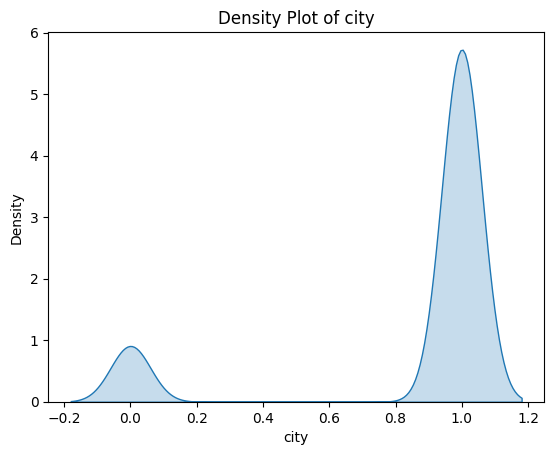

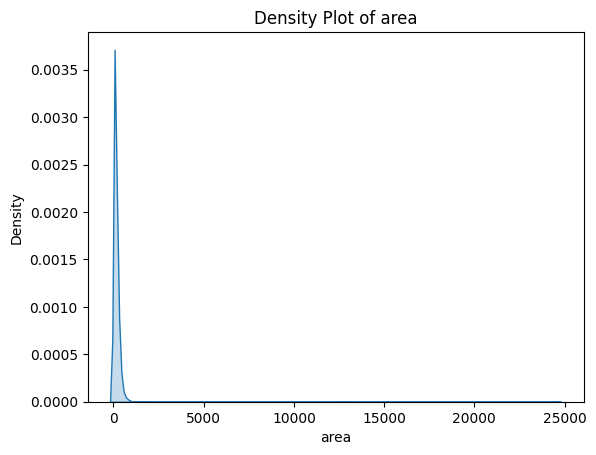

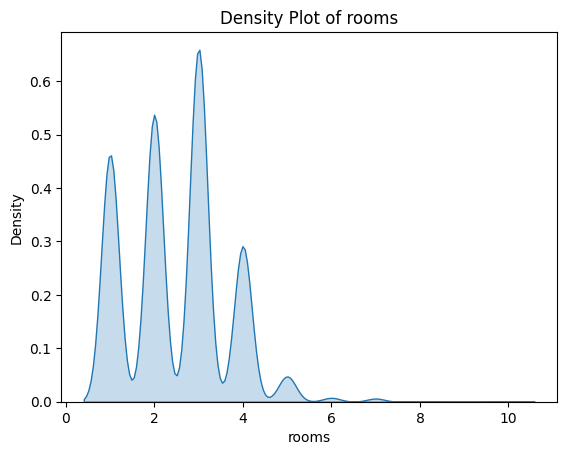

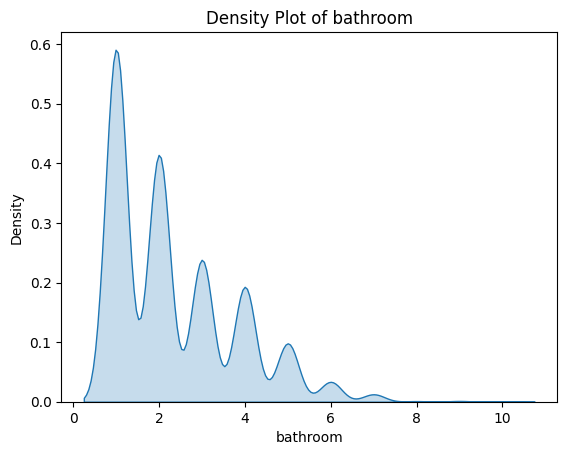

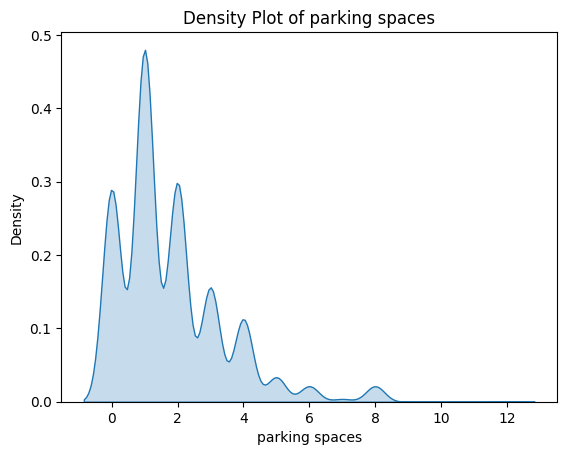

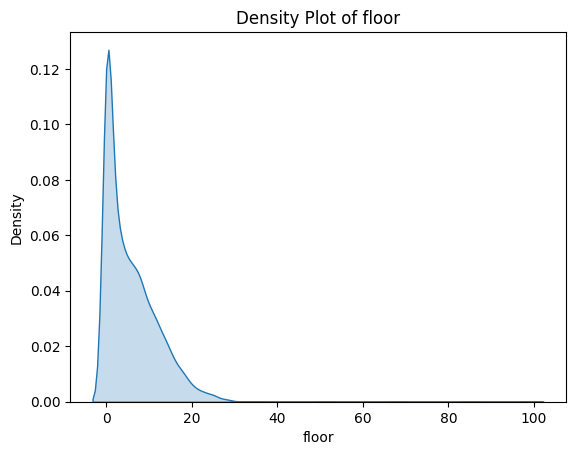

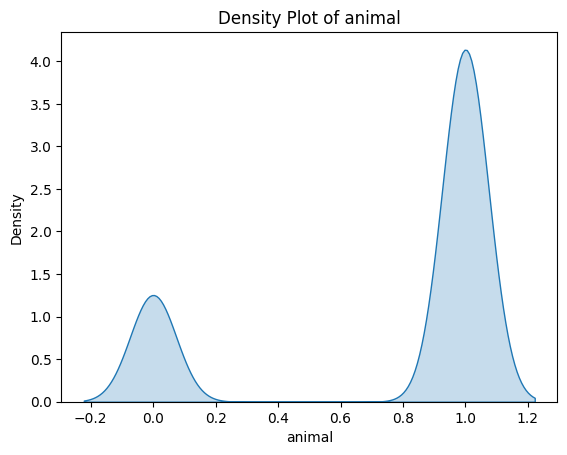

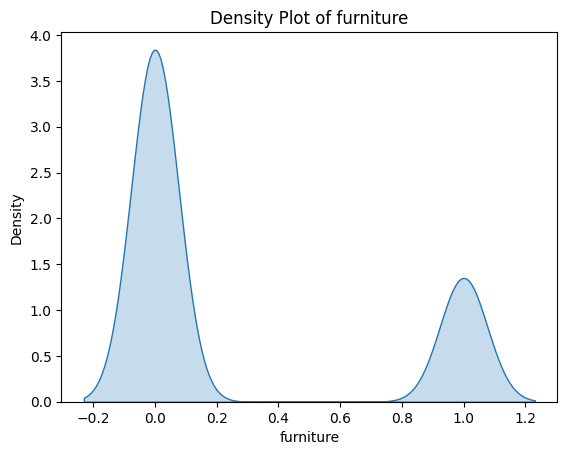

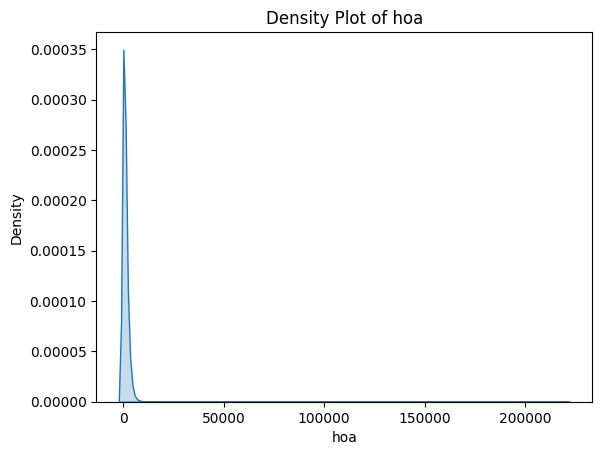

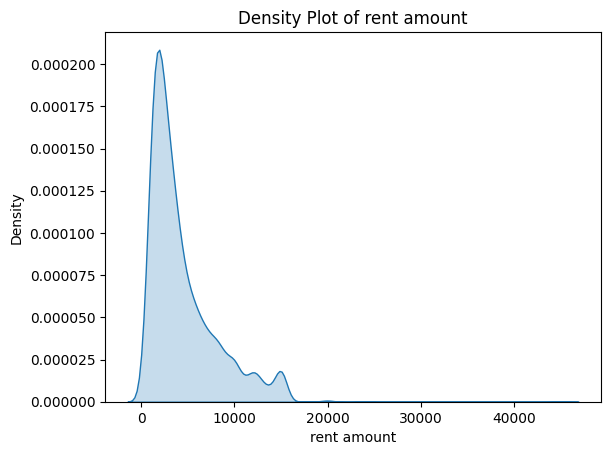

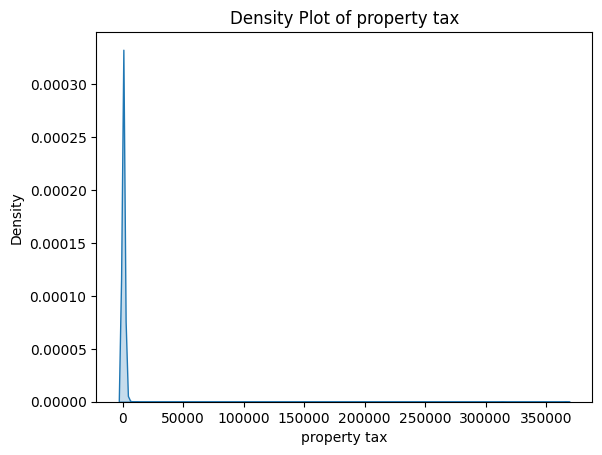

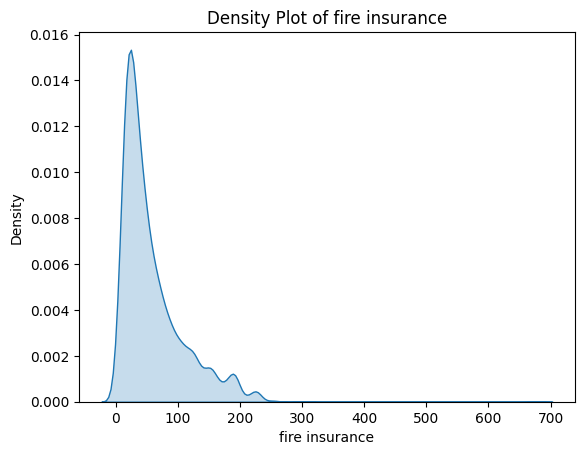

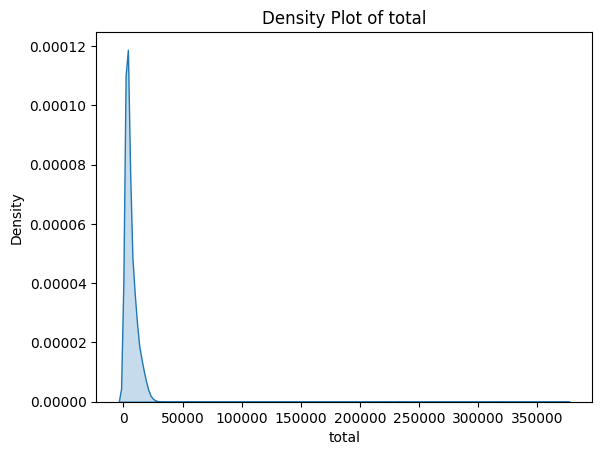

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
    sns.kdeplot(df[column], fill=True)
    plt.xlabel(column)  # Set X-axis label to the column name
    plt.ylabel('Density')  # Set Y-axis label
    plt.title('Density Plot of ' + column)  # Set plot title
    plt.show()
    print()

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", math.floor(mse))

Mean Squared Error: 60


# Random Forest

---



In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", math.floor(mse))

Mean Squared Error: 19024093


# Decision Tree


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", math.floor(mse))

Mean Squared Error: 2844438
